In [16]:
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, balanced_accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import kaggle_data_loader as kdl

# Classical benchmarks on heart-failure dataset from Kaggle

Davide Chicco, Giuseppe Jurman: Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making 20, 16 (2020). (https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5)

License
CC BY 4.0

### Load data

The data loaded here has been transformed using Principal Component Analysis.

In [17]:
n_components = 2
train_df, test_df = kdl.load_train_test_pca(n_components)

max_value = np.max(abs(train_df.values))
plot_range = max_value

train_df.iloc[:,:-1] = train_df.iloc[:,:-1] * plot_range / max_value
test_df.iloc[:,:-1] = test_df.iloc[:,:-1] * plot_range / max_value

train_coordinates = train_df.iloc[:,:-1].values.reshape(-1, 1, n_components)
train_labels = train_df.label
test_coordinates = test_df.iloc[:,:-1].values.reshape(-1, 1, n_components)
test_labels = test_df.label

X_train = train_coordinates.reshape(-1, n_components)
X_test = test_coordinates.reshape(-1, n_components)
y_train = train_labels
y_test = test_labels

### SVM

In [18]:
X_train = train_coordinates.reshape(-1, n_components)
X_test = test_coordinates.reshape(-1, n_components)
y_train = train_labels
y_test = test_labels

clf = svm.SVC(class_weight="balanced")
clf.fit(X_train, y_train)
 
pred_classic = clf.predict(X_train)
print(confusion_matrix(y_true=train_labels, y_pred=pred_classic))
print(classification_report(y_true=train_labels, y_pred=pred_classic))

pred_classic = clf.predict(X_test)
print(confusion_matrix(y_true=test_labels, y_pred=pred_classic))
print(classification_report(y_true=test_labels, y_pred=pred_classic))

[[77 21]
 [ 8 30]]
              precision    recall  f1-score   support

           0       0.91      0.79      0.84        98
           1       0.59      0.79      0.67        38

    accuracy                           0.79       136
   macro avg       0.75      0.79      0.76       136
weighted avg       0.82      0.79      0.79       136

[[55 15]
 [ 5 17]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        70
           1       0.53      0.77      0.63        22

    accuracy                           0.78        92
   macro avg       0.72      0.78      0.74        92
weighted avg       0.82      0.78      0.79        92



In [19]:
#print("ROC: ", roc_auc_score(y_true=test_labels, y_score=test_predictions))
print("Balanced accuracy: ", balanced_accuracy_score(y_true=test_labels, y_pred=pred_classic))

Balanced accuracy:  0.7792207792207793


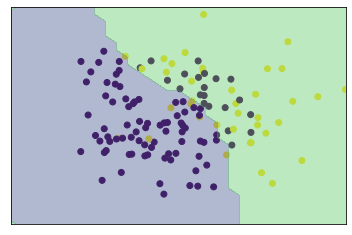

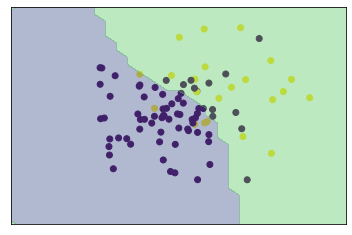

In [24]:
grid_size = 30
x_range = [2 * plot_range * j / grid_size for j in range(-grid_size // 2, grid_size // 2 + 1, 1)]
y_range = x_range
grid_data = np.array([[j, k] for j in x_range for k in y_range]) 
pred_labels = clf.predict(grid_data)

plt.scatter(x=train_coordinates.reshape(-1,2)[:,0], y=train_coordinates.reshape(-1,2)[:,1], c=train_labels)
plt.contourf(x_range, y_range, pred_labels.reshape(grid_size + 1, grid_size + 1).T, levels=[-0.1, 0.5, 1.1], alpha=0.4)
plt.xticks([])
plt.yticks([])
plt.show()

plt.scatter(x=test_coordinates.reshape(-1,2)[:,0], y=test_coordinates.reshape(-1,2)[:,1], c=test_labels)
plt.contourf(x_range, y_range, pred_labels.reshape(grid_size + 1, grid_size + 1).T, levels=[-0.1, 0.5, 1.1], alpha=0.4)
plt.xticks([])
plt.yticks([])
plt.show()

In [21]:
rfc = RandomForestClassifier(class_weight="balanced", max_depth=3, min_samples_leaf=2)
rfc.fit(X_train, y_train)
 
pred_classic = rfc.predict(X_train)
print(confusion_matrix(y_true=train_labels, y_pred=pred_classic))
print(classification_report(y_true=train_labels, y_pred=pred_classic))

pred_classic = rfc.predict(X_test)
score_classic = rfc.predict_proba(X_test)[:,1]
print(confusion_matrix(y_true=test_labels, y_pred=pred_classic))
print(classification_report(y_true=test_labels, y_pred=pred_classic))

[[90  8]
 [ 9 29]]
              precision    recall  f1-score   support

           0       0.91      0.92      0.91        98
           1       0.78      0.76      0.77        38

    accuracy                           0.88       136
   macro avg       0.85      0.84      0.84       136
weighted avg       0.87      0.88      0.87       136

[[66  4]
 [ 9 13]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        70
           1       0.76      0.59      0.67        22

    accuracy                           0.86        92
   macro avg       0.82      0.77      0.79        92
weighted avg       0.85      0.86      0.85        92



In [22]:
print("ROC: ", roc_auc_score(y_true=test_labels, y_score=score_classic))
print("Balanced accuracy: ", balanced_accuracy_score(y_true=test_labels, y_pred=pred_classic))

ROC:  0.8522727272727274
Balanced accuracy:  0.7668831168831169


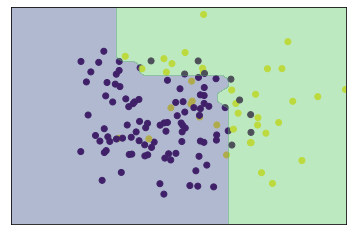

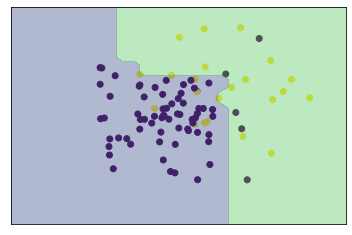

In [25]:
grid_size = 30
x_range = [2 * plot_range * j / grid_size for j in range(-grid_size // 2, grid_size // 2 + 1, 1)]
y_range = x_range
grid_data = np.array([[j, k] for j in x_range for k in y_range])
pred_labels = rfc.predict(grid_data)

plt.scatter(x=train_coordinates.reshape(-1,2)[:,0], y=train_coordinates.reshape(-1,2)[:,1], c=train_labels)
plt.contourf(x_range, y_range, pred_labels.reshape(grid_size + 1, grid_size + 1).T, levels=[-0.1, 0.5, 1.1], alpha=0.4)
plt.xticks([])
plt.yticks([])
plt.show()

plt.scatter(x=test_coordinates.reshape(-1,2)[:,0], y=test_coordinates.reshape(-1,2)[:,1], c=test_labels)
plt.contourf(x_range, y_range, pred_labels.reshape(grid_size + 1, grid_size + 1).T, levels=[-0.1, 0.5, 1.1], alpha=0.4)
plt.xticks([])
plt.yticks([])
plt.show()